In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **STEP 1: READING AND UNDERSTAND DATA**

**1. IMPORT DATA**

In [3]:
lead_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/C9_MachineLearning/M1_Lead scoring Case Study/Lead Scoring Assignment/Leads.csv')

In [ ]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**2. DATA INSPECTION**

In [ ]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
lead_data.shape

(9240, 37)

**3. CLEARNING DATA**

*a. Check columns have unique value*

In [ ]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [4]:
#Drop columns have unique value, beacause it's not affect analysis
lead_data1 = lead_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [ ]:
lead_data1.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

*b. Check columns have missing value*

In [ ]:

round(100*(lead_data1.isnull().sum()/len(lead_data1.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [5]:
missing_values = lead_data1.isnull().sum()/len(lead_data1)

In [6]:
# Filter the columns with over 35% missing values
columns_with_missing_values= missing_values[missing_values>0.35].index

In [7]:
print(columns_with_missing_values)

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [8]:
# Drop the columns with over 35% missing values
lead_data2 = lead_data1.drop(columns_with_missing_values,axis=1)

In [ ]:
lead_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
round(100*(lead_data2.isnull().sum()/len(lead_data2.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

 After delete columns have over 35% null values, I will continuous check columns less than 30% null values


*b.1 Country*

In [9]:
round(lead_data2['Country'].isnull().sum()/len(lead_data2['Country'].index),2)*100

27.0

In [10]:
lead_data2['Country'] = lead_data2['Country'].fillna('not provided')

In [ ]:
round(lead_data2['Country'].isnull().sum()/len(lead_data2['Country'].index),2)*100

0.0

In [11]:
def slots(x):
    category = ""
    if x == "India":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead_data2['Country'] = lead_data2.apply(lambda x:slots(x['Country']), axis = 1)
lead_data2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

*b.2 Specialization*

In [ ]:
round(lead_data2['Specialization'].isnull().sum()/len(lead_data2['Specialization'].index),2)*100

16.0

In [12]:
lead_data2['Specialization'] = lead_data2['Specialization'].fillna('not provided')

In [ ]:
round(lead_data2['Specialization'].isnull().sum()/len(lead_data2['Specialization'].index),2)*100

0.0

*b.3 How did you hear about X Education*

In [ ]:
round(lead_data2['How did you hear about X Education'].value_counts(normalize=True),2)*100

Select                   72.0
Online Search            11.0
Word Of Mouth             5.0
Student of SomeSchool     4.0
Other                     3.0
Multiple Sources          2.0
Advertisements            1.0
Social Media              1.0
Email                     0.0
SMS                       0.0
Name: How did you hear about X Education, dtype: float64

*We can see value "Select" more than 70% and this column has 23.89% null value, therefore we can drop it.*

In [13]:
lead_data2 = lead_data2.drop('How did you hear about X Education',1)

*b.4 What is your current occupation*

In [ ]:
round(lead_data2['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [ ]:
round(lead_data2['What is your current occupation'].isnull().sum()/len(lead_data2['What is your current occupation'].index),2)*100

28.999999999999996

In [14]:
lead_data2['What is your current occupation'] = lead_data2['What is your current occupation'].fillna('Not provided')

In [ ]:
round(lead_data2['What is your current occupation'].isnull().sum()/len(lead_data2['What is your current occupation'].index),2)*100

0.0

*b.5 What matters most to you in choosing a course*

In [ ]:
round(lead_data2['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [ ]:
round(lead_data2['What matters most to you in choosing a course'].isnull().sum()/len(lead_data2['What matters most to you in choosing a course'].index),2)*100

28.999999999999996

In [15]:
lead_data2['What matters most to you in choosing a course'] = lead_data2['What matters most to you in choosing a course'].fillna('Not provided')

In [ ]:
round(lead_data2['What matters most to you in choosing a course'].isnull().sum()/len(lead_data2['What matters most to you in choosing a course'].index),2)*100

0.0

*b.6 Lead Profile*

In [ ]:
round(lead_data2['Lead Profile'].value_counts(normalize=True),2)*100

Select                         63.0
Potential Lead                 25.0
Other Leads                     7.0
Student of SomeSchool           4.0
Lateral Student                 0.0
Dual Specialization Student     0.0
Name: Lead Profile, dtype: float64

In [16]:
lead_data2 = lead_data2.drop('Lead Profile',1)

We can see value "Select" more than 60% and this column has 29.32% null value, therefore we can drop it.

*b.7 City*

In [ ]:
round(lead_data2['City'].value_counts(normalize=True),2)*100

Mumbai                         41.0
Select                         29.0
Thane & Outskirts              10.0
Other Cities                    9.0
Other Cities of Maharashtra     6.0
Other Metro Cities              5.0
Tier II Cities                  1.0
Name: City, dtype: float64

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [17]:
lead_data2['City'] = lead_data2['City'].fillna('Mumbai')

In [ ]:
round(lead_data2['City'].isnull().sum()/len(lead_data2['City'].index),2)*100

0.0

In [ ]:
#Check again null percentages after remove above columns

In [ ]:
round(lead_data2.isnull().sum()/len(lead_data2.index),2)*100

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [18]:
#Missing values are under 2%, can drop these rows.
lead_data2.dropna(inplace = True)

In [19]:
lead_data2 = lead_data2[lead_data2.isnull().sum(axis=1)<1]

In [ ]:
round(lead_data2.isnull().sum()/len(lead_data2.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                            

In [20]:
#Remove Prospect ID columns
lead_data2 = lead_data2.drop('Prospect ID',1)


In [21]:
lead_data_final = lead_data2.drop('Lead Number',1)

In [22]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

**After cleaning data, we can use this dataset for next step**

# **STEP 2: EXPLORATORY DATA ANALYSIS**

**1. Univariate Analysis**

***a. Numberic Variables***

In [23]:
lead_data_final.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


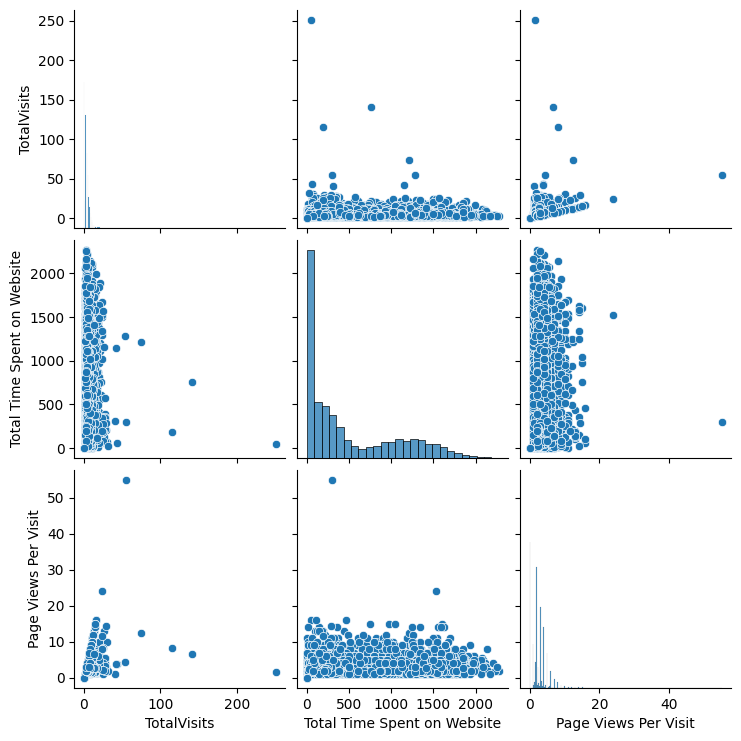

In [24]:
sns.pairplot(lead_data_final,vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit'])
plt.show()

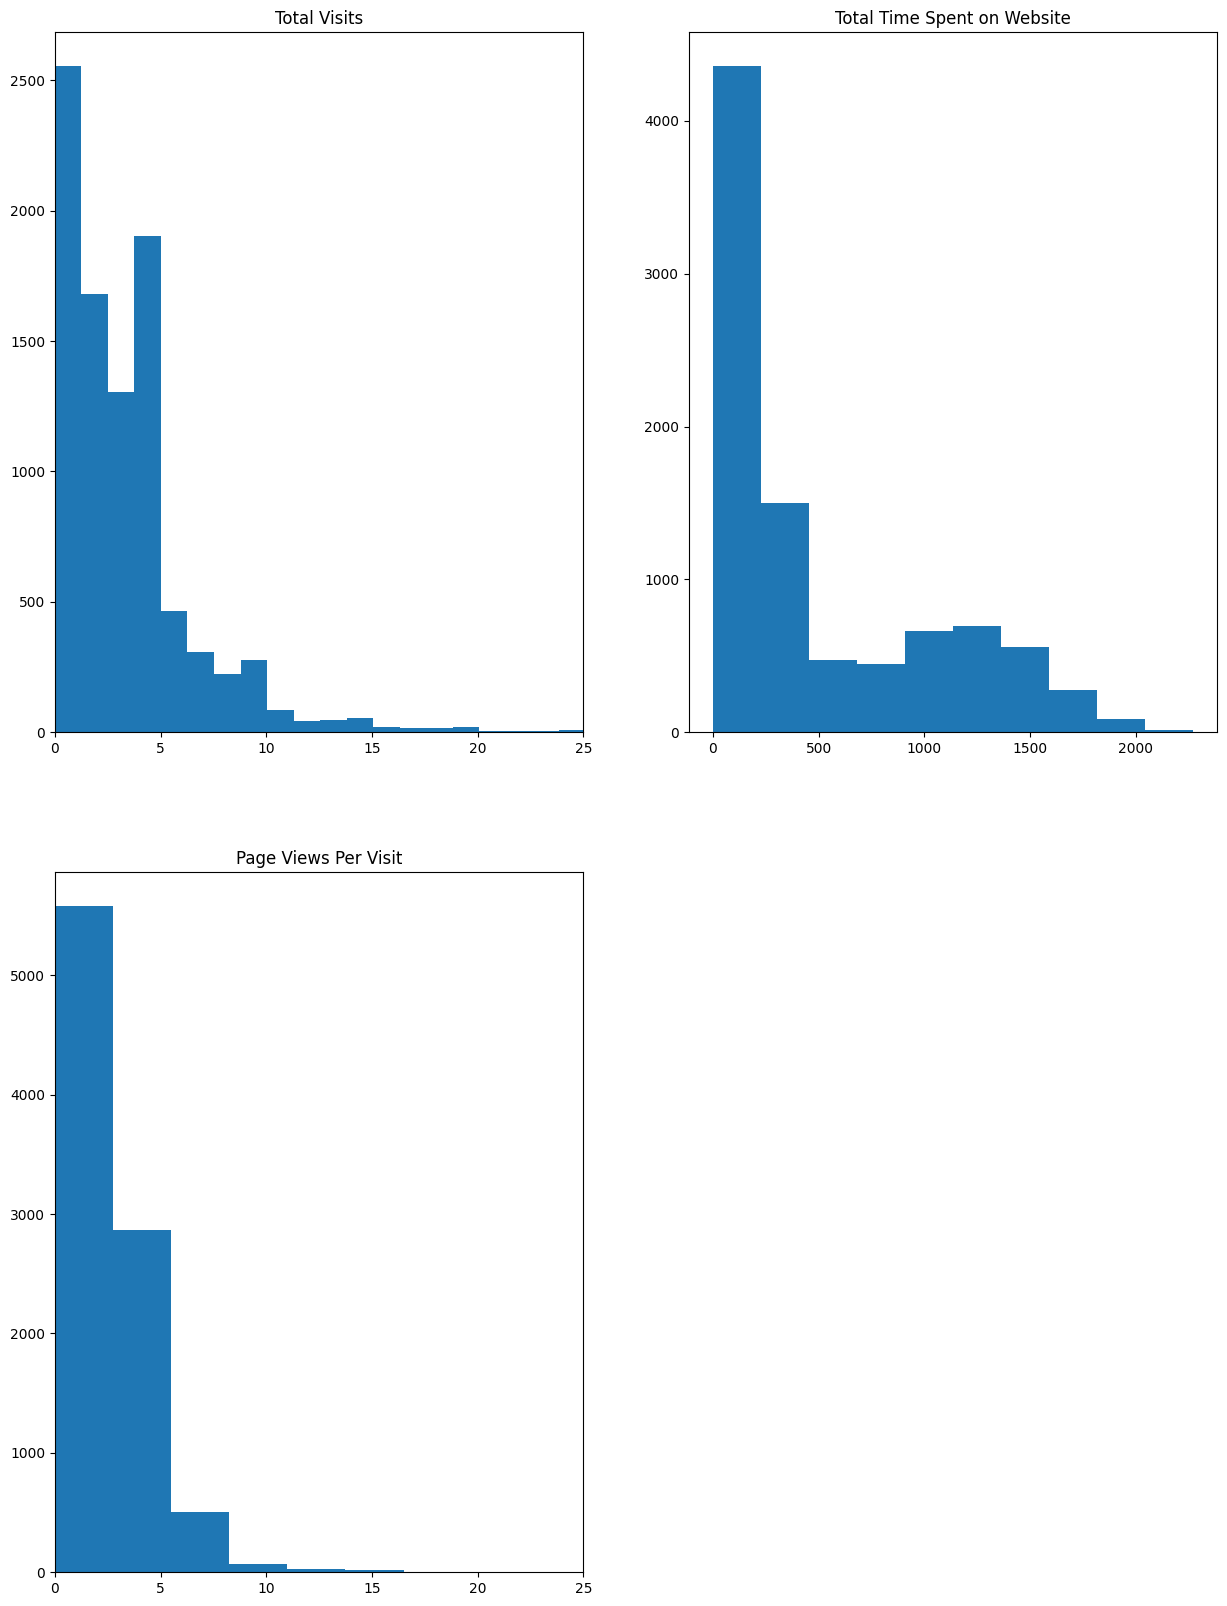

In [25]:
plt.figure(figsize=(15,20))

plt.subplot(221)
plt.hist(lead_data_final['TotalVisits'],bins=200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_data_final['Total Time Spent on Website'],bins=10)
plt.title('Total Time Spent on Website')


plt.subplot(223)
plt.hist(lead_data_final['Page Views Per Visit'],bins=20)
plt.title('Page Views Per Visit')
plt.xlim(0,25)

plt.show()

***b. Visualising Categorical Variables***

In [26]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

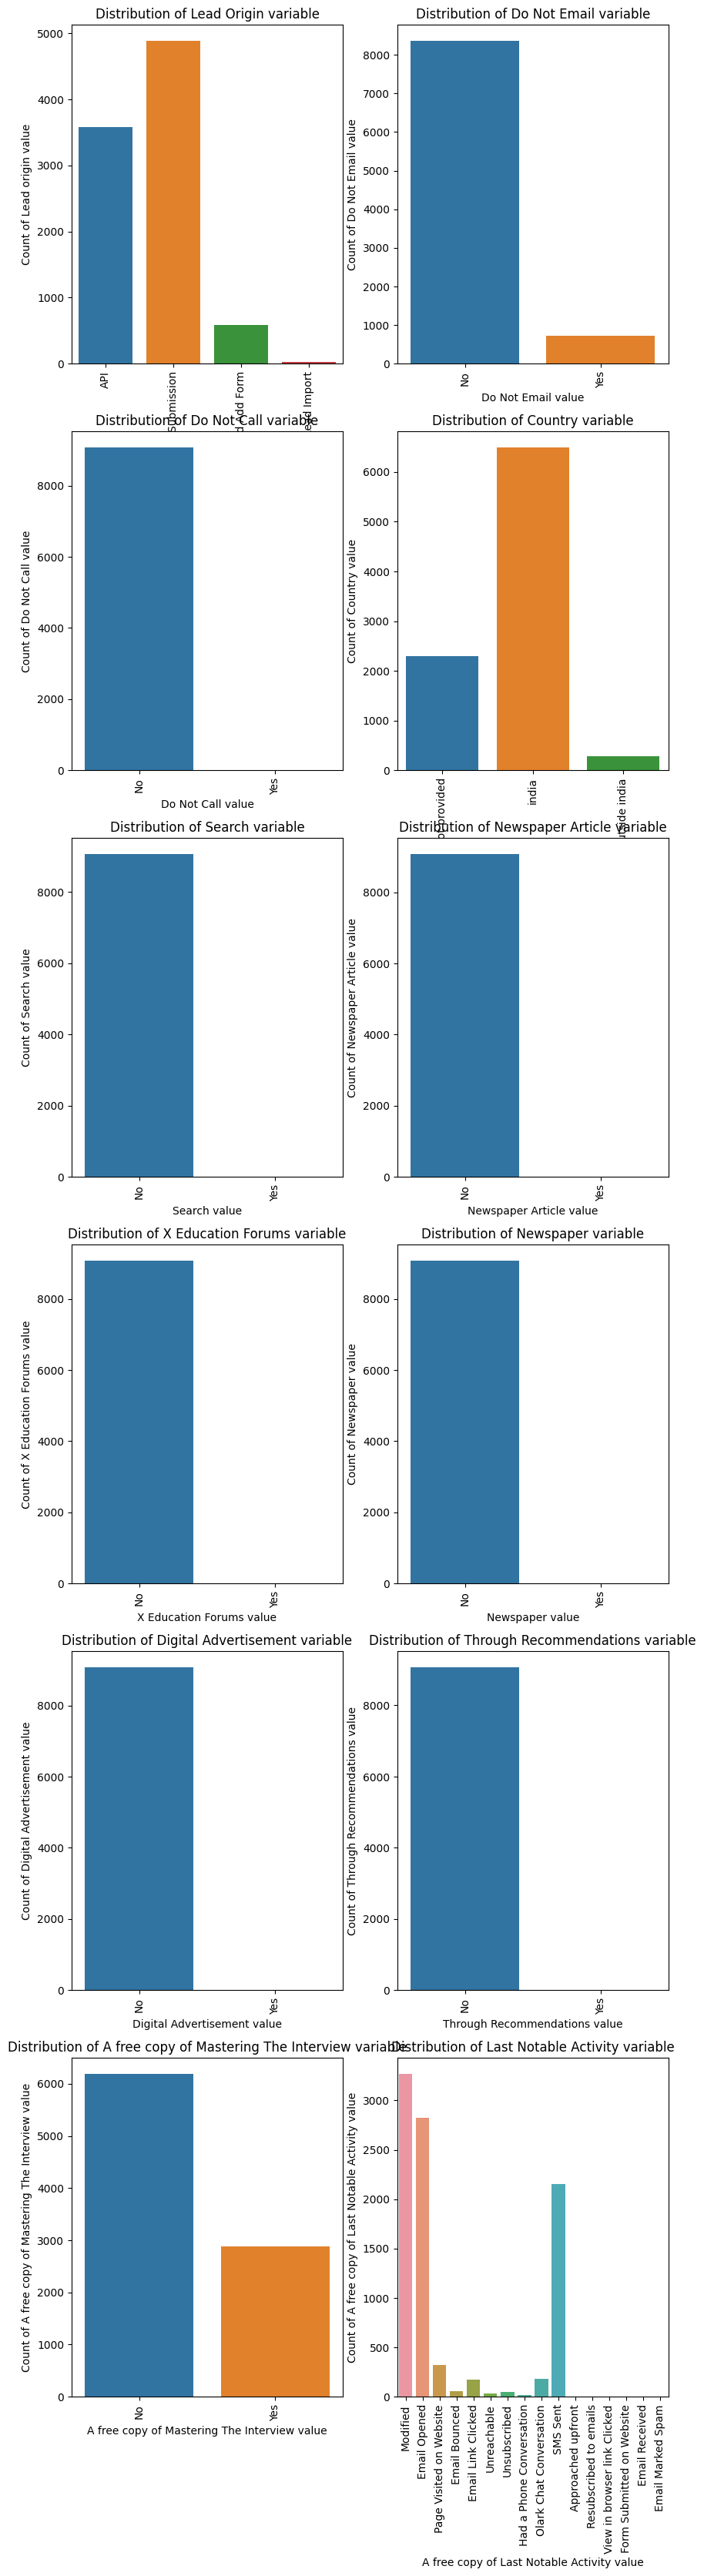

In [27]:
plt.figure(figsize=(10,40))

plt.subplot(6,2,1)
sns.countplot(x='Lead Origin',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Lead value')
plt.ylabel('Count of Lead origin value')
plt.title('Distribution of Lead Origin variable')

plt.subplot(6,2,2)
sns.countplot(x='Do Not Email',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Do Not Email value')
plt.ylabel('Count of Do Not Email value')
plt.title('Distribution of Do Not Email variable')

plt.subplot(6,2,3)
sns.countplot(x='Do Not Call',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Do Not Call value')
plt.ylabel('Count of Do Not Call value')
plt.title('Distribution of Do Not Call variable')

plt.subplot(6,2,4)
sns.countplot(x='Country',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Country value')
plt.ylabel('Count of Country value')
plt.title('Distribution of Country variable')

plt.subplot(6,2,5)
sns.countplot(x='Search',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Search value')
plt.ylabel('Count of Search value')
plt.title('Distribution of Search variable')

plt.subplot(6,2,6)
sns.countplot(x='Newspaper Article',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Newspaper Article value')
plt.ylabel('Count of Newspaper Article value')
plt.title('Distribution of Newspaper Article variable')

plt.subplot(6,2,7)
sns.countplot(x='X Education Forums',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('X Education Forums value')
plt.ylabel('Count of X Education Forums value')
plt.title('Distribution of X Education Forums variable')

plt.subplot(6,2,8)
sns.countplot(x='Newspaper',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Newspaper value')
plt.ylabel('Count of Newspaper value')
plt.title('Distribution of Newspaper variable')

plt.subplot(6,2,9)
sns.countplot(x='Digital Advertisement',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Digital Advertisement value')
plt.ylabel('Count of Digital Advertisement value')
plt.title('Distribution of Digital Advertisement variable')

plt.subplot(6,2,10)
sns.countplot(x='Through Recommendations',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Through Recommendations value')
plt.ylabel('Count of Through Recommendations value')
plt.title('Distribution of Through Recommendations variable')

plt.subplot(6,2,11)
sns.countplot(x='A free copy of Mastering The Interview',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('A free copy of Mastering The Interview value')
plt.ylabel('Count of A free copy of Mastering The Interview value')
plt.title('Distribution of A free copy of Mastering The Interview variable')

plt.subplot(6,2,12)
sns.countplot(x='Last Notable Activity',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('A free copy of Last Notable Activity value')
plt.ylabel('Count of A free copy of Last Notable Activity value')
plt.title('Distribution of Last Notable Activity variable')

plt.show()

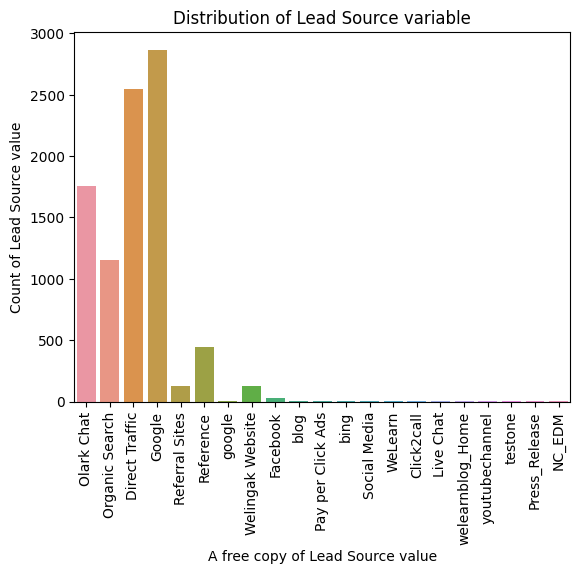

In [28]:

sns.countplot(x='Lead Source',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('A free copy of Lead Source value')
plt.ylabel('Count of Lead Source value')
plt.title('Distribution of Lead Source variable')

plt.show()

*Insight: We can see that Google and ABC are the channel with the most customer source*

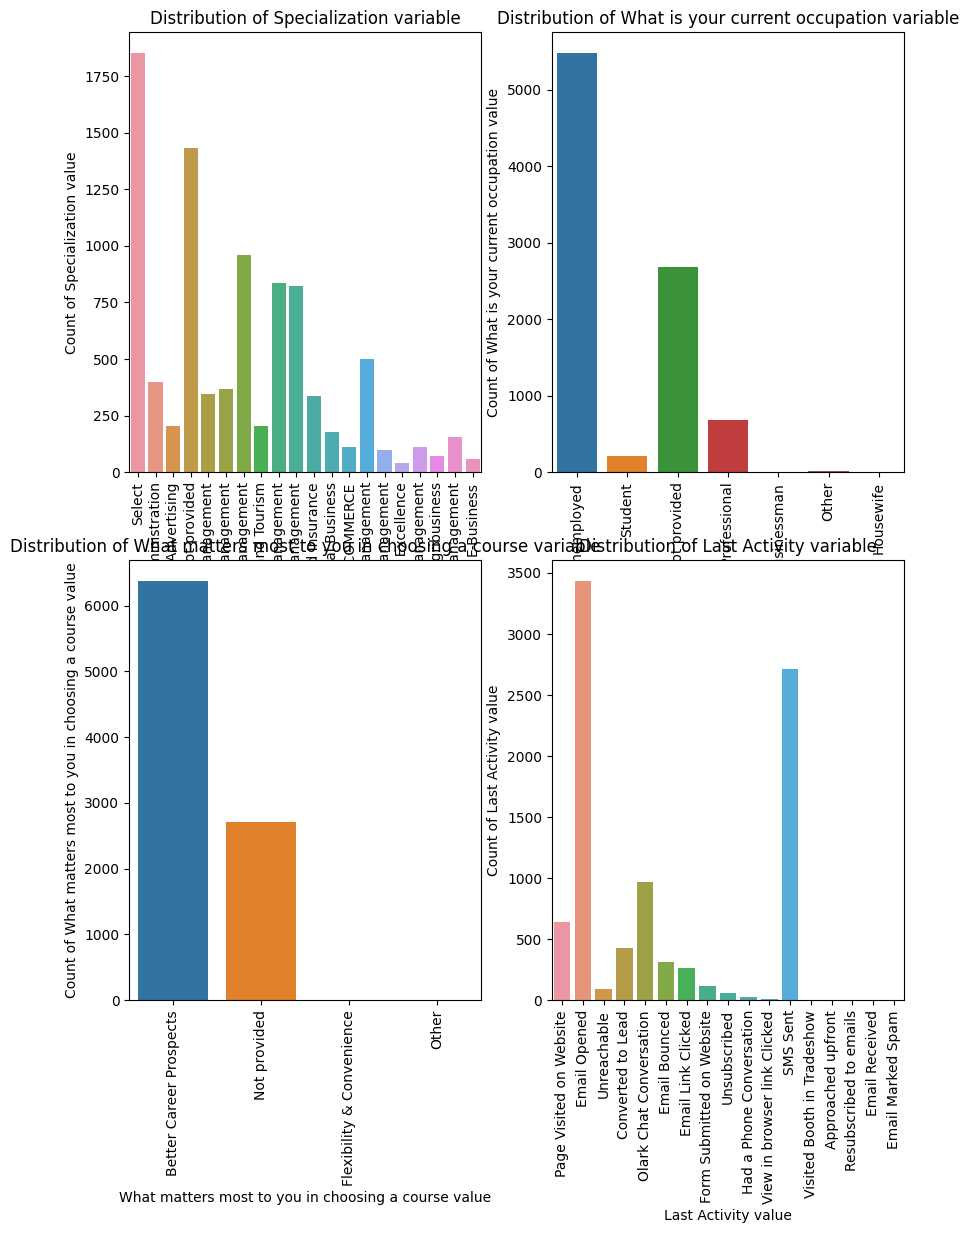

In [29]:
plt.figure(figsize=(10,40))

plt.subplot(6,2,1)
sns.countplot(x='Specialization',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Specialization value')
plt.ylabel('Count of Specialization value')
plt.title('Distribution of Specialization variable')

plt.subplot(6,2,2)
sns.countplot(x='What is your current occupation',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('What is your current occupation value')
plt.ylabel('Count of What is your current occupation value')
plt.title('Distribution of What is your current occupation variable')

plt.subplot(6,2,3)
sns.countplot(x='What matters most to you in choosing a course',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('What matters most to you in choosing a course value')
plt.ylabel('Count of What matters most to you in choosing a course value')
plt.title('Distribution of What matters most to you in choosing a course variable')

plt.subplot(6,2,4)
sns.countplot(x='Last Activity',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Last Activity value')
plt.ylabel('Count of Last Activity value')
plt.title('Distribution of Last Activity variable')

plt.show()

Text(0.5, 1.0, 'Distribution of Converted variable')

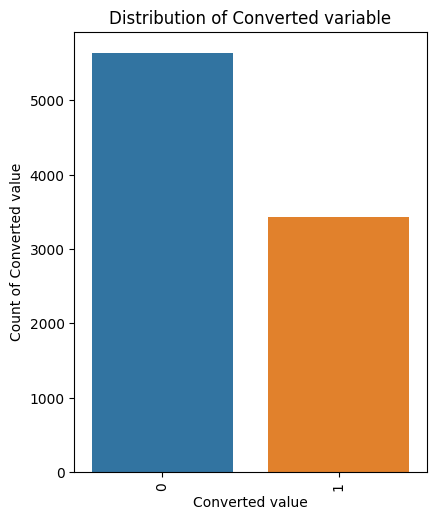

In [30]:
plt.figure(figsize=(10,40))

plt.subplot(6,2,1)
sns.countplot(x='Converted',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.xlabel('Converted value')
plt.ylabel('Count of Converted value')
plt.title('Distribution of Converted variable')

In [31]:
lead_data_converted=lead_data_final.loc[lead_data_final['Converted']==1]
lead_data_not_converted=lead_data_final.loc[lead_data_final['Converted']==0]

In [32]:
lead_data_converted['Converted'].value_counts()

1    3435
Name: Converted, dtype: int64

In [33]:
lead_data_not_converted['Converted'].value_counts()

0    5639
Name: Converted, dtype: int64

In [34]:
round(len(lead_data_not_converted)/len(lead_data_converted),2)

1.64

*Check ratio of lead not converted and lead converted, and ration is: 1.64*



*After, we will check categorical variables with converted*

**2. Associate all categorical variables with Converted**

In [35]:
def template_subplot(title_1,title_2):
  plt.figure(figsize=(10,10))

  plt.subplot(1,2,1)
  sns.countplot(x=title_1,hue='Converted',data=lead_data_final).tick_params(axis='x',rotation=90)
  plt.title(title_1)

  plt.subplot(1,2,2)
  sns.countplot(x=title_2,hue='Converted',data=lead_data_final).tick_params(axis='x',rotation=90)
  plt.title(title_2)

  plt.show()

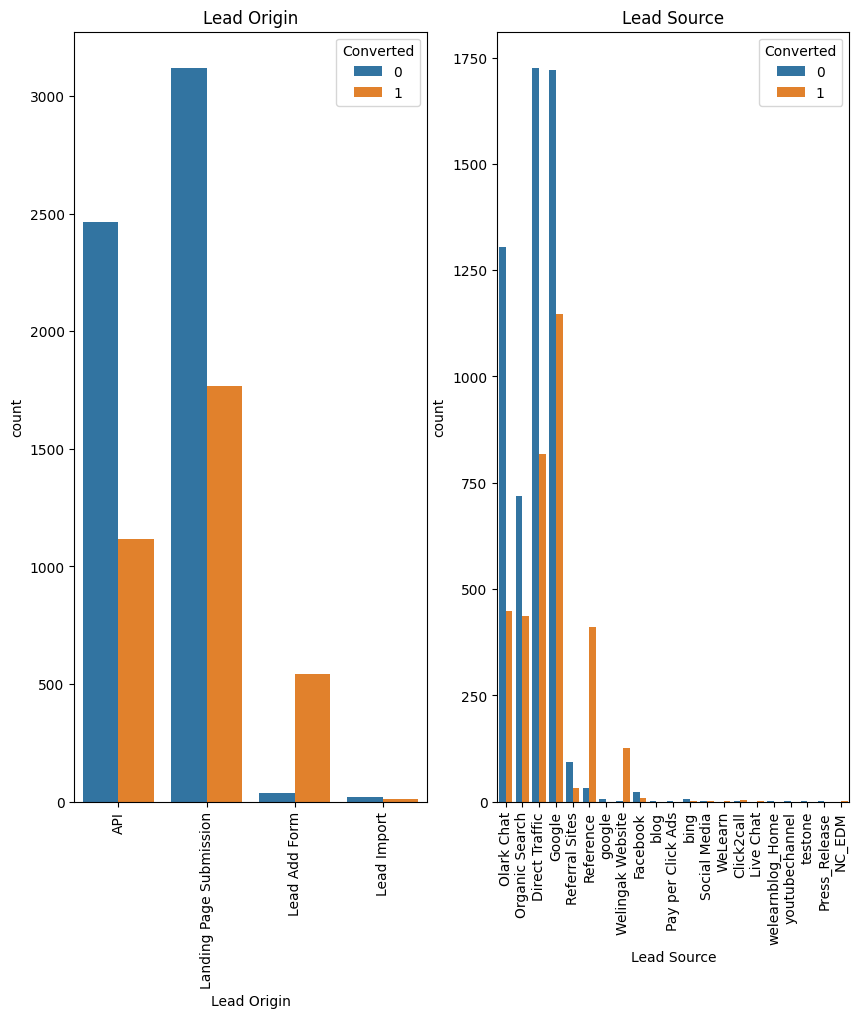

In [36]:
template_subplot('Lead Origin','Lead Source')

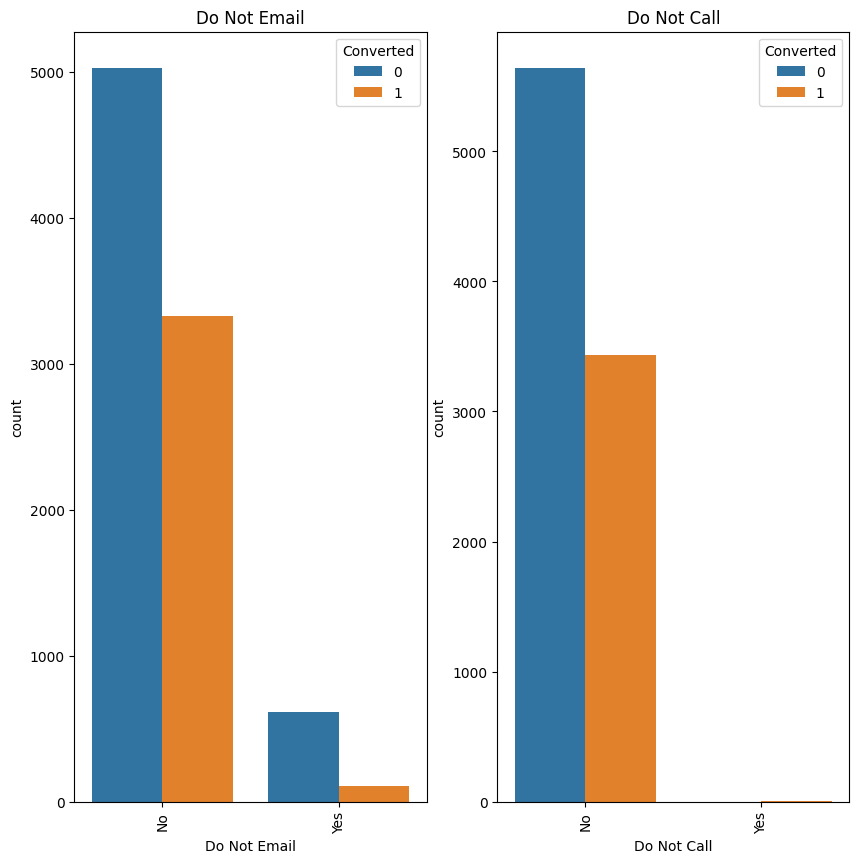

In [37]:
template_subplot('Do Not Email','Do Not Call')

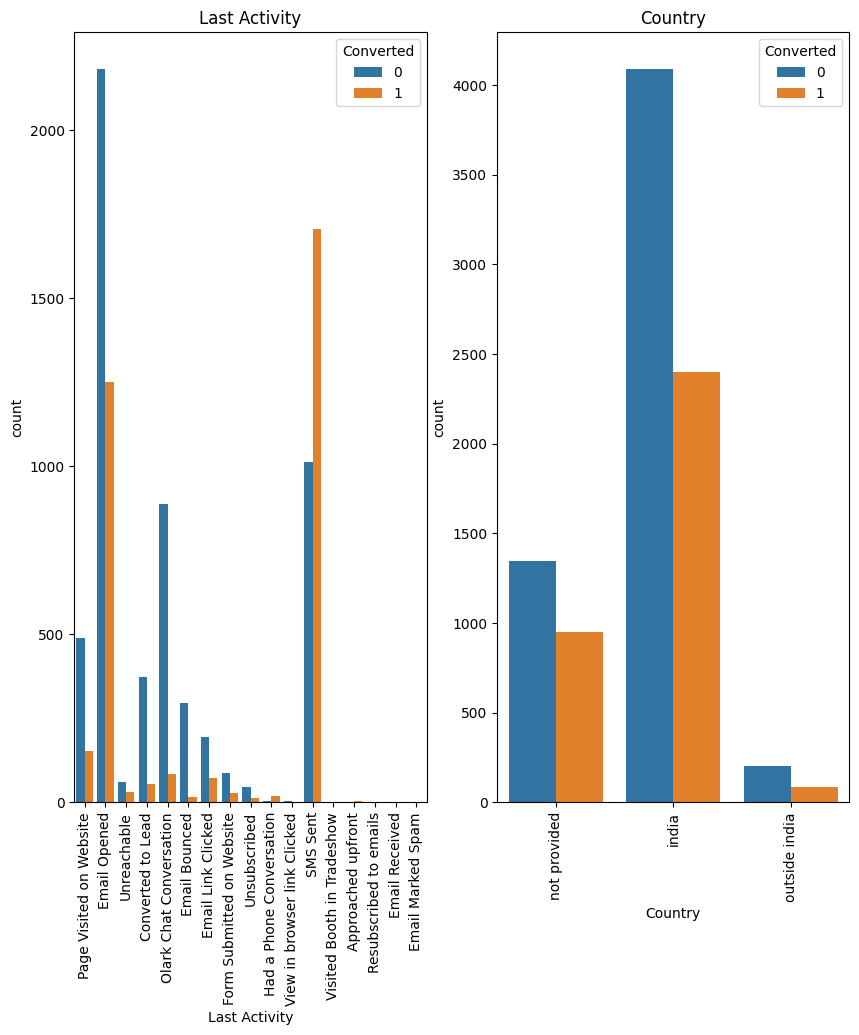

In [38]:
template_subplot('Last Activity','Country')

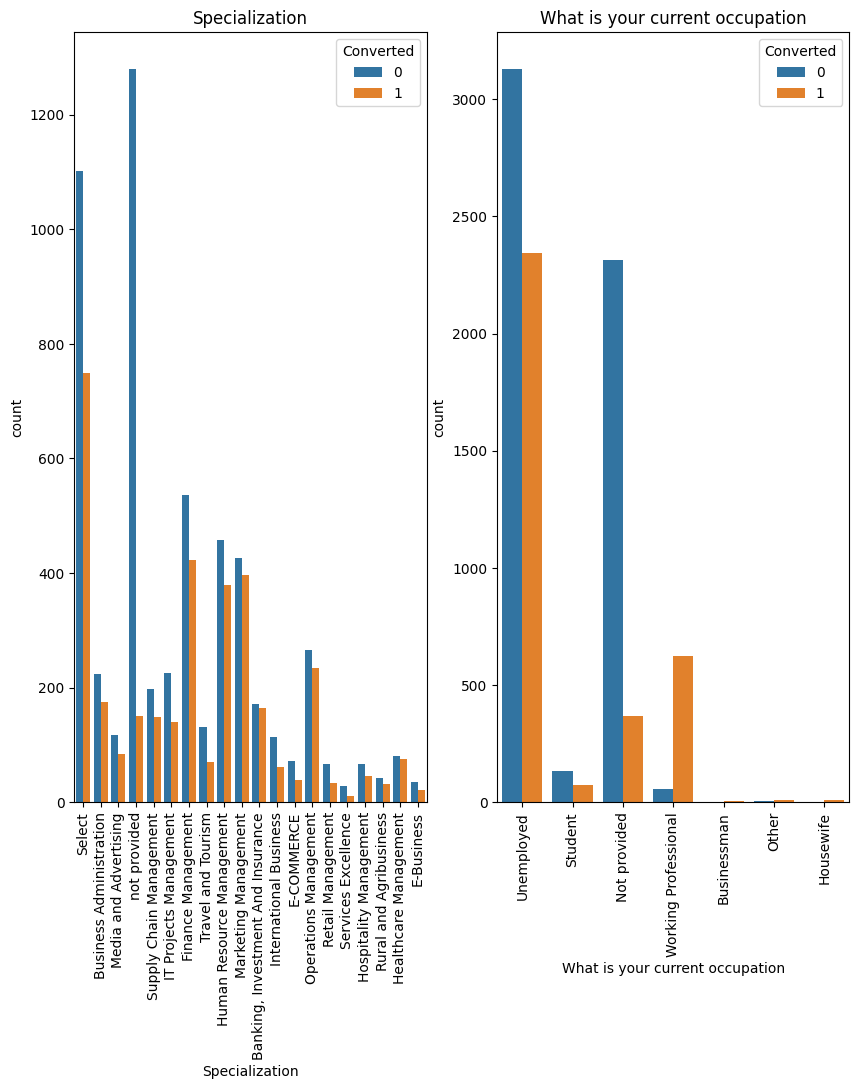

In [39]:
template_subplot('Specialization','What is your current occupation')

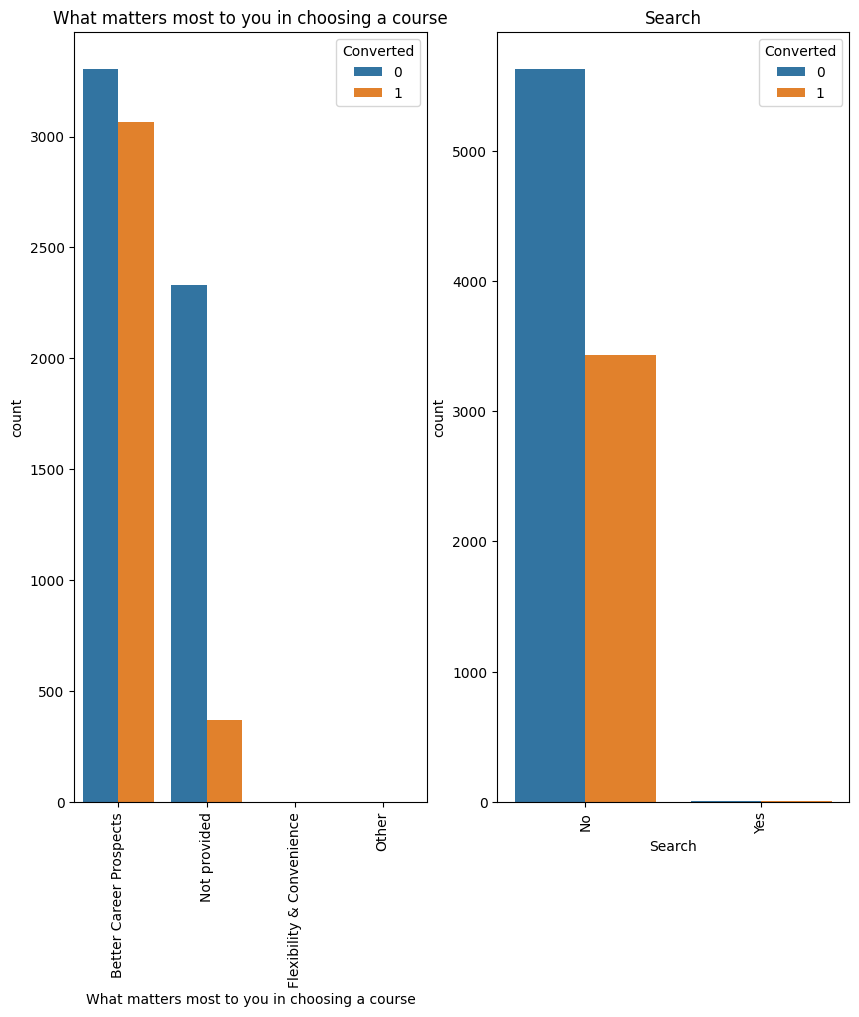

In [40]:
template_subplot('What matters most to you in choosing a course','Search')

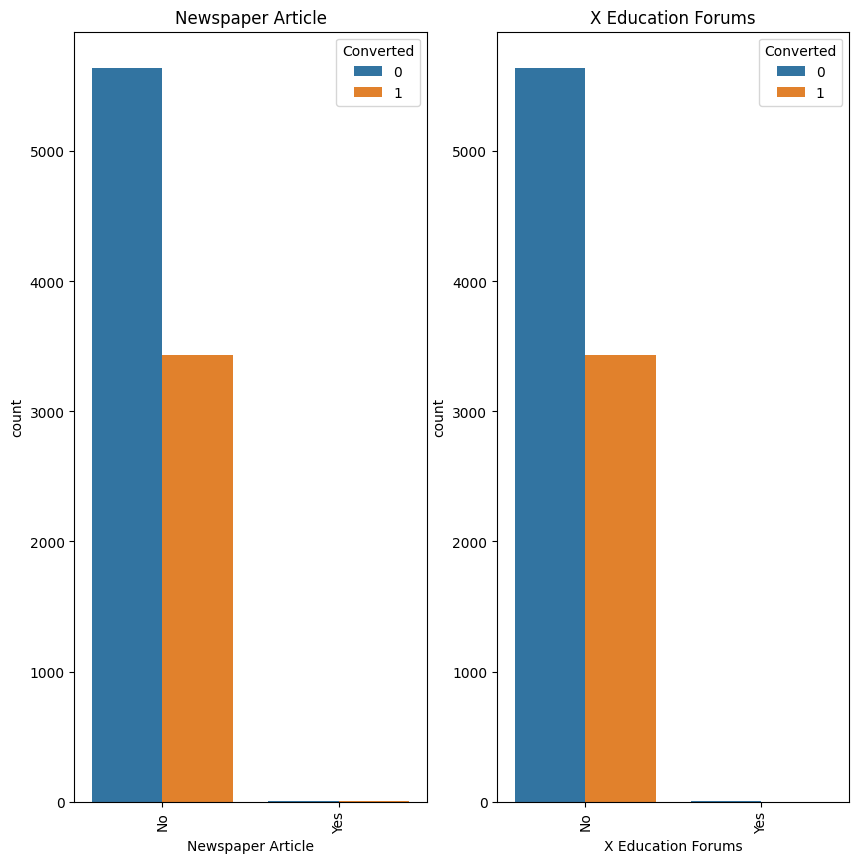

In [41]:
template_subplot('Newspaper Article','X Education Forums')

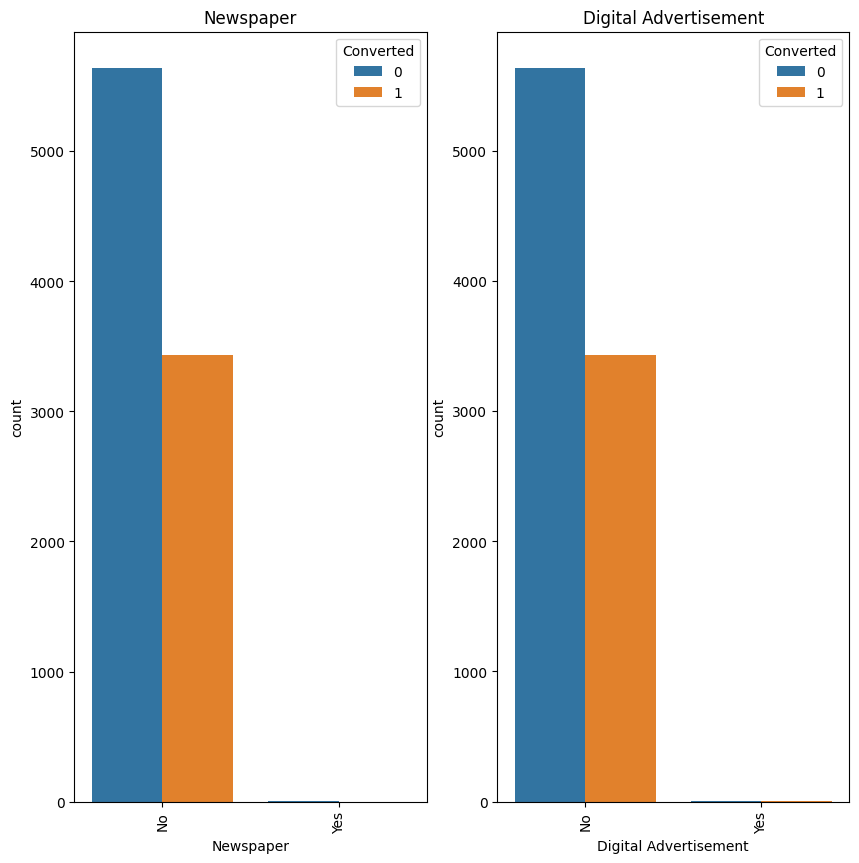

In [42]:
template_subplot('Newspaper','Digital Advertisement')

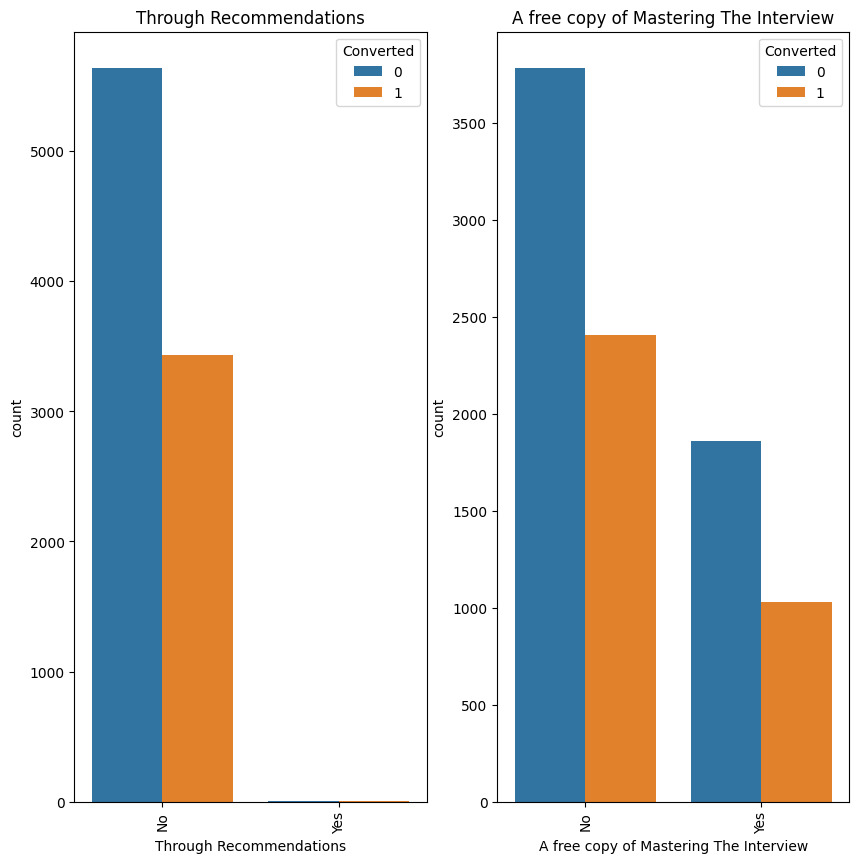

In [43]:
template_subplot('Through Recommendations','A free copy of Mastering The Interview')

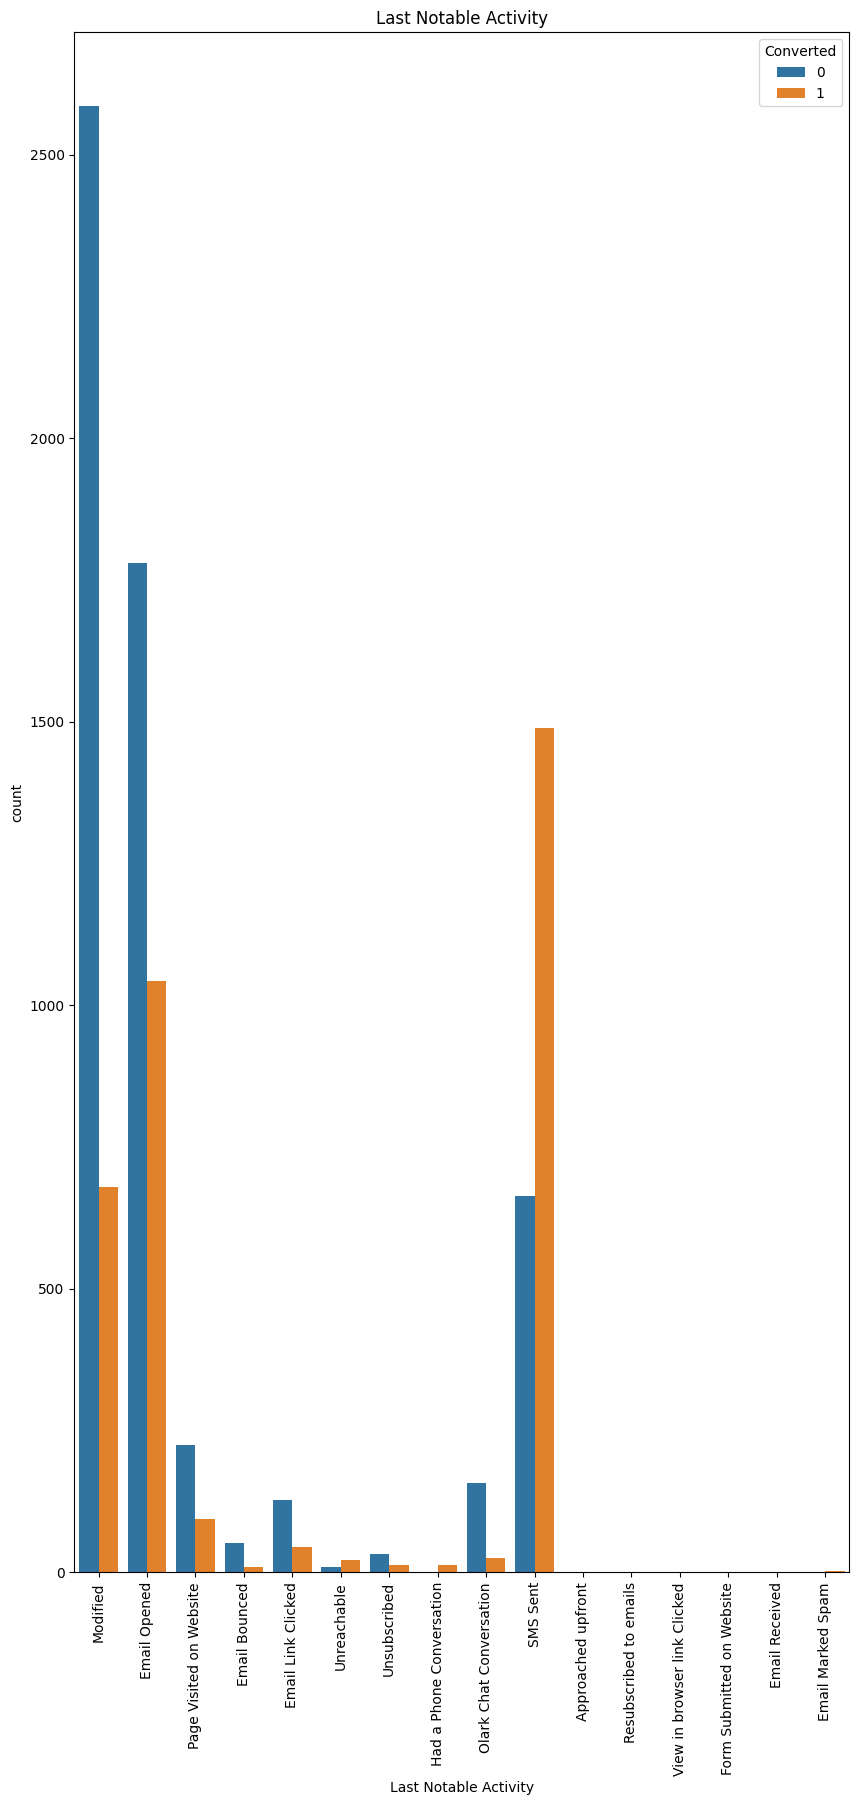

In [44]:
plt.figure(figsize=(10,20))

sns.countplot(x='Last Notable Activity',hue='Converted',data=lead_data_final).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

Insight: We see "SMS Sent" have Converted variable more than Not Converted

In [45]:
numeric = lead_data_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


# **STEP 3: DATA PREPARATION**

***1. Creating Dummy variables***

In [46]:
lead_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [47]:
lead_data_final.loc[:,lead_data_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
## I will create Dummy variables for category variables: 'Lead Origin','Specialization','Lead Source','Do Not Email',
## 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'

In [48]:
lead_dummy = pd.get_dummies(lead_data_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_data_dum = pd.concat([lead_data_final, lead_dummy], axis=1)
lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,india,...,0,0,0,0,0,0,1,0,0,0


***2. Drop columns unwanted***

In [49]:
lead_data_dum = lead_data_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity','City'], 1)
lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [50]:
lead_data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9074 non-null   uint8  
 6   Lead Origin_Lead Import                               9074 non-null   uint8  
 7   Specialization_Business Administration                9074 non-null   uint8  
 8   Specialization_E-Business                             9074

# **STEP 4: SPLITTING THE DATA INTO TRAINING AND TESTING SETS**

***1. Split data***

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X=lead_data_dum.drop(['Converted'],1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
y=lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
#Check data after split
print (X.shape)
print (y.shape)

(9074, 83)
(9074,)


In [55]:
# Split the dataset into 70% and 30% for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

***2. Rescaling the features***

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [59]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# **STEP 5: BUILDING A LINEAR MODEL**

***1. Recursive Feature Elimination***

In [60]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression

In [61]:
logreg=LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE

In [63]:
rfe = RFE (logreg, step=15)

In [64]:
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.score(X_train,y_train)

0.8170366871358841

In [66]:
#List of variable selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', False, 2),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 2),
 ('Specialization_Healthcare Management', False, 2),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_IT Projects Management', False, 2),
 ('Specialization_International Business', False, 3),
 ('Specialization_Marketing Management', False, 2),
 ('Specialization_Media and Advertising', False, 4),
 ('Specialization_Operations Management', False, 2),
 ('Specialization_Retail Management', False, 3),
 ('Specialization_Rural and Agribusiness', False, 2),
 ('Specialization_Select', True, 1),
 ('Sp

In [67]:
#Columns where RFE support is True
col=X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_E-COMMERCE', 'Specialization_Hospitality Management',
       'Specialization_Select', 'Specialization_Services Excellence',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupation_Housew

In [68]:
X_train_rfe = X_train[col]

***2. Building model using statsmode***

In [69]:
import statsmodels.api as sm

*Model 1*

In [70]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [ ]:
lm1 = sm.GLM(y_train,X_train_rfe1,family = sm.families.Binomial())
res = lm1.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Tue, 20 Jun 2023   Deviance:                       5077.9
Time:                        08:19:40   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4143
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()

vif['Feature']= X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Feature,VIF
38,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
30,What is your current occupation_Unemployed,90.31
4,Lead Origin_Lead Add Form,85.32
13,Lead Source_Reference,65.43
28,What is your current occupation_Not provided,43.48
10,Lead Source_Google,42.19
9,Lead Source_Direct Traffic,38.69
11,Lead Source_Olark Chat,26.40
16,Lead Source_Welingak Website,19.37


*Model 2*

Remove 'Last Notable Activity_Resubscribed to emails' variable, because thi value has hight p-value anh hight VIF

In [73]:
X_train_rfe2 = X_train_rfe1.drop (["Last Notable Activity_Resubscribed to emails"],axis =1)

In [74]:
X_train_sm = sm.add_constant(X_train_rfe2)
lm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm2.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.9
Date:                Tue, 20 Jun 2023   Deviance:                       5077.9
Time:                        13:43:49   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4143
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe2,i)for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,710.35
31,What is your current occupation_Unemployed,117.79
29,What is your current occupation_Not provided,102.68
5,Lead Origin_Lead Add Form,80.70
14,Lead Source_Reference,62.57
11,Lead Source_Google,38.04
10,Lead Source_Direct Traffic,36.35
32,What is your current occupation_Working Profes...,34.03
12,Lead Source_Olark Chat,28.21
13,Lead Source_Organic Search,20.64


*Model 3*

Remove "Last Activity_Resubscribed to emails" variable, because this variable has hight P-value

In [77]:
X_train_rfe3= X_train_rfe2.drop(["Last Activity_Resubscribed to emails"],axis = 1)

In [78]:
X_train_sm = sm.add_constant(X_train_rfe3)
lm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm3.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2540.0
Date:                Tue, 20 Jun 2023   Deviance:                       5080.1
Time:                        13:44:06   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4141
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe3,i)for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,710.15
30,What is your current occupation_Unemployed,117.79
28,What is your current occupation_Not provided,102.68
5,Lead Origin_Lead Add Form,80.70
14,Lead Source_Reference,62.57
11,Lead Source_Google,38.04
10,Lead Source_Direct Traffic,36.35
31,What is your current occupation_Working Profes...,34.03
12,Lead Source_Olark Chat,28.21
13,Lead Source_Organic Search,20.64


*Model 4*

Remove "Last Notable Activity_Had a Phone Conversation" variable, because this variable has hight P-value

In [81]:
X_train_rfe4=X_train_rfe3.drop(["Last Notable Activity_Had a Phone Conversation"], axis=1)

In [82]:
X_train_sm = sm.add_constant(X_train_rfe4)
lm4 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm4.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.0
Date:                Tue, 20 Jun 2023   Deviance:                       5083.9
Time:                        13:44:24   Pearson chi2:                 6.52e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4138
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe4,i)for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,709.85
30,What is your current occupation_Unemployed,117.79
28,What is your current occupation_Not provided,102.68
5,Lead Origin_Lead Add Form,80.70
14,Lead Source_Reference,62.57
11,Lead Source_Google,38.04
10,Lead Source_Direct Traffic,36.35
31,What is your current occupation_Working Profes...,34.03
12,Lead Source_Olark Chat,28.21
13,Lead Source_Organic Search,20.63


*Model 5*

Remove "What is your current occupation_Housewife", because this variable has hight P-value

In [85]:
X_train_rfe5= X_train_rfe4.drop(["What is your current occupation_Housewife"],axis=1)

In [86]:
X_train_sm = sm.add_constant(X_train_rfe5)
lm5 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm5.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.0
Date:                Tue, 20 Jun 2023   Deviance:                       5088.0
Time:                        13:44:48   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4134
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe5,i)for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,569.69
29,What is your current occupation_Unemployed,85.15
5,Lead Origin_Lead Add Form,80.70
27,What is your current occupation_Not provided,74.37
14,Lead Source_Reference,62.57
11,Lead Source_Google,38.04
10,Lead Source_Direct Traffic,36.35
12,Lead Source_Olark Chat,28.21
30,What is your current occupation_Working Profes...,24.81
13,Lead Source_Organic Search,20.63


*Model 6*

Remove "Specialization_Services Excellence", because this variable has hight P-value

In [89]:
X_train_rfe6 = X_train_rfe5.drop(["Specialization_Services Excellence"],axis = 1)

In [90]:
X_train_sm = sm.add_constant(X_train_rfe6)
lm6 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm6.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.3
Date:                Tue, 20 Jun 2023   Deviance:                       5088.5
Time:                        13:45:12   Pearson chi2:                 6.51e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4133
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF Check

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe6,i)for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,569.68
28,What is your current occupation_Unemployed,85.15
5,Lead Origin_Lead Add Form,80.70
26,What is your current occupation_Not provided,74.37
13,Lead Source_Reference,62.57
10,Lead Source_Google,38.04
9,Lead Source_Direct Traffic,36.34
11,Lead Source_Olark Chat,28.21
29,What is your current occupation_Working Profes...,24.81
12,Lead Source_Organic Search,20.63


*Model 7*

Remove "Last Notable Activity_Unsubscribed", because this varialbe has hight P-value

In [92]:
X_train_rfe7 = X_train_rfe6.drop(["Last Notable Activity_Unsubscribed"],axis=1)

In [93]:
X_train_sm = sm.add_constant(X_train_rfe7)
lm7 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm7.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.5
Date:                Tue, 20 Jun 2023   Deviance:                       5089.1
Time:                        13:45:26   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4133
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe7,i)for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,564.18
28,What is your current occupation_Unemployed,85.15
5,Lead Origin_Lead Add Form,80.70
26,What is your current occupation_Not provided,74.37
13,Lead Source_Reference,62.57
10,Lead Source_Google,38.03
9,Lead Source_Direct Traffic,36.32
11,Lead Source_Olark Chat,28.19
29,What is your current occupation_Working Profes...,24.81
12,Lead Source_Organic Search,20.63


*Model 8*

Remove "Specialization_E-COMMERCE", because this variable has hight P-value

In [95]:
X_train_rfe8= X_train_rfe7.drop(["Specialization_E-COMMERCE"],axis=1)

In [96]:
X_train_sm = sm.add_constant(X_train_rfe8)
lm8 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm8.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.9
Date:                Tue, 20 Jun 2023   Deviance:                       5089.7
Time:                        13:45:44   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4132
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe8,i)for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,563.70
27,What is your current occupation_Unemployed,85.11
5,Lead Origin_Lead Add Form,80.70
25,What is your current occupation_Not provided,74.34
12,Lead Source_Reference,62.57
9,Lead Source_Google,37.99
8,Lead Source_Direct Traffic,36.31
10,Lead Source_Olark Chat,28.17
28,What is your current occupation_Working Profes...,24.80
11,Lead Source_Organic Search,20.61


*Model 9*

Remove "Lead Origin_Lead Add Form", because this variable has hight P-value

In [98]:
X_train_rfe9 = X_train_rfe8.drop(["Lead Origin_Lead Add Form"],axis=1)

In [99]:
X_train_sm = sm.add_constant(X_train_rfe9)
lm9 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm9.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.3
Date:                Tue, 20 Jun 2023   Deviance:                       5090.5
Time:                        13:46:02   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe9,i)for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,555.88
26,What is your current occupation_Unemployed,85.11
24,What is your current occupation_Not provided,74.34
8,Lead Source_Google,36.30
7,Lead Source_Direct Traffic,34.73
9,Lead Source_Olark Chat,27.00
27,What is your current occupation_Working Profes...,24.80
10,Lead Source_Organic Search,19.72
25,What is your current occupation_Student,9.04
11,Lead Source_Reference,8.92


*Model 10*

Remove "Lead Source_Social Media", because this value has hight P-value

In [101]:
X_train_rfe10= X_train_rfe9.drop(["Lead Source_Social Media"],axis=1)

In [102]:
X_train_sm = sm.add_constant(X_train_rfe10)
lm10 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm10.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2545.6
Date:                Tue, 20 Jun 2023   Deviance:                       5091.1
Time:                        13:46:22   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe10,i)for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,548.01
25,What is your current occupation_Unemployed,85.11
23,What is your current occupation_Not provided,74.34
8,Lead Source_Google,34.56
7,Lead Source_Direct Traffic,33.09
9,Lead Source_Olark Chat,25.74
26,What is your current occupation_Working Profes...,24.80
10,Lead Source_Organic Search,18.81
24,What is your current occupation_Student,9.04
11,Lead Source_Reference,8.55


*Model 11*

Remove "Lead Source_Olark Chat", because this variable has hight P-value

In [104]:
X_train_rfe11= X_train_rfe10.drop(["Lead Source_Olark Chat"],axis=1)

In [105]:
X_train_sm = sm.add_constant(X_train_rfe11)
lm11 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm11.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2546.3
Date:                Tue, 20 Jun 2023   Deviance:                       5092.6
Time:                        13:46:38   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4130
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [ ]:
#VIF check

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe11.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe11,i)for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,391.37
24,What is your current occupation_Unemployed,85.11
22,What is your current occupation_Not provided,74.33
25,What is your current occupation_Working Profes...,24.80
23,What is your current occupation_Student,9.04
27,Last Notable Activity_Email Opened,6.47
20,Last Activity_SMS Sent,5.05
7,Lead Source_Direct Traffic,3.95
28,Last Notable Activity_Modified,3.90
8,Lead Source_Google,3.33


*Model 12*

Remmove "Last Activity_Form Submitted on Website", because this variable has hight P-value

In [107]:
X_train_rfe12 = X_train_rfe11.drop(["Last Activity_Form Submitted on Website"],axis=1)

In [108]:
X_train_sm = sm.add_constant(X_train_rfe12)
lm12 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm12.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2547.3
Date:                Tue, 20 Jun 2023   Deviance:                       5094.6
Time:                        13:47:05   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4128
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe12.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe12,i)for i in range(X_train_rfe12.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,389.19
23,What is your current occupation_Unemployed,85.08
21,What is your current occupation_Not provided,74.30
24,What is your current occupation_Working Profes...,24.79
22,What is your current occupation_Student,9.03
26,Last Notable Activity_Email Opened,6.20
19,Last Activity_SMS Sent,4.78
7,Lead Source_Direct Traffic,3.95
27,Last Notable Activity_Modified,3.90
8,Lead Source_Google,3.32


*Model 13*

Remove "What is your current occupation_Unemployed", because this variable has hight VIF

In [110]:
X_train_rfe13 = X_train_rfe12.drop(["What is your current occupation_Unemployed"],axis=1)

In [111]:
X_train_sm = sm.add_constant(X_train_rfe13)
lm13 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm13.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.5
Date:                Tue, 20 Jun 2023   Deviance:                       5101.0
Time:                        13:47:19   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe13.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe13,i)for i in range(X_train_rfe13.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,34.09
25,Last Notable Activity_Email Opened,6.19
19,Last Activity_SMS Sent,4.78
7,Lead Source_Direct Traffic,3.95
26,Last Notable Activity_Modified,3.90
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.91
28,Last Notable Activity_Page Visited on Website,2.69
18,Last Activity_Page Visited on Website,2.66
9,Lead Source_Organic Search,2.57


*Model 14*

Remove "What is your current occupation_Student", because this variable has hight P-value

In [113]:
X_train_rfe14 = X_train_rfe13.drop(["What is your current occupation_Student"],axis=1)

In [114]:
X_train_sm = sm.add_constant(X_train_rfe14)
lm14 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm14.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.7
Date:                Tue, 20 Jun 2023   Deviance:                       5101.4
Time:                        13:47:32   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4121
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe14.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe14,i)for i in range(X_train_rfe14.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,34.04
24,Last Notable Activity_Email Opened,6.19
19,Last Activity_SMS Sent,4.78
7,Lead Source_Direct Traffic,3.95
25,Last Notable Activity_Modified,3.90
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.91
27,Last Notable Activity_Page Visited on Website,2.69
18,Last Activity_Page Visited on Website,2.66
9,Lead Source_Organic Search,2.57


*Model 15*

Remove "Last Activity_Unreachable", because this variable has hight p-value

In [116]:
X_train_rfe15= X_train_rfe14.drop(["Last Activity_Unreachable"],axis=1)

In [117]:
X_train_sm = sm.add_constant(X_train_rfe15)
lm15 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm15.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.0
Date:                Tue, 20 Jun 2023   Deviance:                       5104.0
Time:                        13:47:46   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4119
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe15.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe15,i)for i in range(X_train_rfe15.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,33.68
23,Last Notable Activity_Email Opened,6.09
19,Last Activity_SMS Sent,4.68
7,Lead Source_Direct Traffic,3.95
24,Last Notable Activity_Modified,3.90
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.91
26,Last Notable Activity_Page Visited on Website,2.69
18,Last Activity_Page Visited on Website,2.62
9,Lead Source_Organic Search,2.57


*Model 16*

Remove "Last Notable Activity_Unreachable", because this variable has hight VIF

In [119]:
X_train_rfe16 = X_train_rfe15.drop(["Last Notable Activity_Unreachable"],axis=1)

In [120]:
X_train_sm = sm.add_constant(X_train_rfe16)
lm16 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm16.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.5
Date:                Tue, 20 Jun 2023   Deviance:                       5105.1
Time:                        13:48:01   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4118
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe16.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe16,i)for i in range(X_train_rfe16.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,31.80
23,Last Notable Activity_Email Opened,5.69
19,Last Activity_SMS Sent,4.38
7,Lead Source_Direct Traffic,3.95
24,Last Notable Activity_Modified,3.72
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.91
26,Last Notable Activity_Page Visited on Website,2.66
18,Last Activity_Page Visited on Website,2.61
9,Lead Source_Organic Search,2.57


*Model 17*

Remove "Last Notable Activity_Email Opened", because this variable has hight VIF

In [122]:
X_train_rfe17 = X_train_rfe16.drop(["Last Notable Activity_Email Opened"],axis=1)

In [123]:
X_train_sm = sm.add_constant(X_train_rfe17)
lm17 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm17.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.7
Date:                Tue, 20 Jun 2023   Deviance:                       5129.4
Time:                        13:48:17   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe17.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe17,i)for i in range(X_train_rfe17.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,12.78
7,Lead Source_Direct Traffic,3.94
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.90
9,Lead Source_Organic Search,2.56
18,Last Activity_Page Visited on Website,2.45
3,Page Views Per Visit,2.42
25,Last Notable Activity_Page Visited on Website,2.37
17,Last Activity_Olark Chat Conversation,1.96
15,Last Activity_Email Bounced,1.87


*Model 18*

Remove "Last Activity_Page Visited on Website", because this variable has hight P-value

In [125]:
X_train_rfe18 = X_train_rfe17.drop(["Last Activity_Page Visited on Website"],axis=1)

In [126]:
X_train_sm = sm.add_constant(X_train_rfe18)
lm18 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm18.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.4
Date:                Tue, 20 Jun 2023   Deviance:                       5130.7
Time:                        13:48:34   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe18.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe18,i)for i in range(X_train_rfe18.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,12.78
7,Lead Source_Direct Traffic,3.94
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.90
9,Lead Source_Organic Search,2.56
3,Page Views Per Visit,2.42
6,Specialization_Select,1.87
17,Last Activity_Olark Chat Conversation,1.86
1,TotalVisits,1.85
15,Last Activity_Email Bounced,1.81


*Model 19*

Remove "Last Activity_Email Bounced", because this variable has hight P-value

In [128]:
X_train_rfe19 = X_train_rfe18.drop(["Last Activity_Email Bounced"],axis=1)

In [129]:
X_train_sm = sm.add_constant(X_train_rfe19)
lm19 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm19.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.3
Date:                Tue, 20 Jun 2023   Deviance:                       5132.6
Time:                        13:48:48   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4092
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe19.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe19,i)for i in range(X_train_rfe19.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,12.76
7,Lead Source_Direct Traffic,3.94
8,Lead Source_Google,3.32
4,Lead Origin_Landing Page Submission,2.90
9,Lead Source_Organic Search,2.56
3,Page Views Per Visit,2.41
6,Specialization_Select,1.87
1,TotalVisits,1.84
16,Last Activity_Olark Chat Conversation,1.82
21,Last Notable Activity_Modified,1.53


*Model 20*

Remove "Last Activity_Converted to Lead", because this variable has hight p-value

In [131]:
X_train_rfe20 = X_train_rfe19.drop(["Last Activity_Converted to Lead"],axis=1)

In [132]:
X_train_sm = sm.add_constant(X_train_rfe20)
lm20 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm20.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Tue, 20 Jun 2023   Deviance:                       5135.3
Time:                        13:49:03   Pearson chi2:                 6.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4090
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe20.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe20,i)for i in range(X_train_rfe20.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,12.76
7,Lead Source_Direct Traffic,3.84
8,Lead Source_Google,3.24
4,Lead Origin_Landing Page Submission,2.90
9,Lead Source_Organic Search,2.48
3,Page Views Per Visit,2.38
6,Specialization_Select,1.87
1,TotalVisits,1.83
15,Last Activity_Olark Chat Conversation,1.74
17,What is your current occupation_Not provided,1.47


*Model 21*

Remove "Last Notable Activity_Olark Chat Conversation", because this variable has hight p-value (>0.05)

In [134]:
X_train_rfe21 = X_train_rfe20.drop(["Last Notable Activity_Olark Chat Conversation"],axis=1)

In [135]:
X_train_sm = sm.add_constant(X_train_rfe21)
lm21 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm21.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.4
Date:                Tue, 20 Jun 2023   Deviance:                       5138.7
Time:                        13:49:19   Pearson chi2:                 6.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4087
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [136]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe21.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe21,i)for i in range(X_train_rfe21.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,12.73
7,Lead Source_Direct Traffic,3.84
8,Lead Source_Google,3.24
4,Lead Origin_Landing Page Submission,2.90
9,Lead Source_Organic Search,2.48
3,Page Views Per Visit,2.38
6,Specialization_Select,1.87
1,TotalVisits,1.83
17,What is your current occupation_Not provided,1.47
15,Last Activity_Olark Chat Conversation,1.40


*Model 22*

Remove "Lead Source_Direct Traffic"

In [137]:
X_train_rfe22 = X_train_rfe21.drop(["Lead Source_Direct Traffic"],axis=1)

In [138]:
X_train_sm = sm.add_constant(X_train_rfe22)
lm22 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm22.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.6
Date:                Tue, 20 Jun 2023   Deviance:                       5225.1
Time:                        13:49:33   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4006
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe22.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe22,i)for i in range(X_train_rfe22.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,11.30
3,Page Views Per Visit,2.32
4,Lead Origin_Landing Page Submission,2.20
6,Specialization_Select,1.87
1,TotalVisits,1.82
16,What is your current occupation_Not provided,1.47
8,Lead Source_Organic Search,1.39
14,Last Activity_Olark Chat Conversation,1.35
7,Lead Source_Google,1.33
9,Lead Source_Reference,1.32


*Model 23*

Drop "Lead Source_Referral Sites", because this variable has hight p-value

In [140]:
X_train_rfe23 = X_train_rfe22.drop(["Lead Source_Referral Sites"],axis=1)

In [141]:
X_train_sm = sm.add_constant(X_train_rfe23)
lm23 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm23.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.2
Date:                Tue, 20 Jun 2023   Deviance:                       5226.4
Time:                        13:49:47   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4005
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe23.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe23,i)for i in range(X_train_rfe23.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,11.24
3,Page Views Per Visit,2.27
4,Lead Origin_Landing Page Submission,2.16
6,Specialization_Select,1.87
1,TotalVisits,1.82
15,What is your current occupation_Not provided,1.47
8,Lead Source_Organic Search,1.36
13,Last Activity_Olark Chat Conversation,1.35
9,Lead Source_Reference,1.32
7,Lead Source_Google,1.30


*Model 24*

Remove "Page Views Per Visit"

In [143]:
X_train_rfe24 = X_train_rfe23.drop(["Page Views Per Visit"],axis=1)

In [144]:
X_train_sm = sm.add_constant(X_train_rfe24)
lm24 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = lm24.fit()
print (res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.4
Date:                Tue, 20 Jun 2023   Deviance:                       5254.8
Time:                        13:50:06   Pearson chi2:                 6.47e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3978
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

VIF check

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe24.columns
vif['VIF'] =[variance_inflation_factor(X_train_rfe24,i)for i in range(X_train_rfe24.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,const,11.10
3,Lead Origin_Landing Page Submission,1.97
5,Specialization_Select,1.87
14,What is your current occupation_Not provided,1.47
1,TotalVisits,1.41
12,Last Activity_Olark Chat Conversation,1.34
8,Lead Source_Reference,1.31
2,Total Time Spent on Website,1.28
17,Last Notable Activity_Modified,1.24
6,Lead Source_Google,1.23


After all, the model has reached the optimal, and meets the requirements: p-values and VIF both are within an acceptable range.

# **STEP 6: RESIDUAL ANALYSIS OF THE TRAIN DATA**

In [146]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.662025
3604    0.081368
5584    0.182857
7679    0.079650
7563    0.178387
7978    0.898703
7780    0.163390
7863    0.985217
838     0.732503
708     0.254578
dtype: float64

In [147]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66202482, 0.08136772, 0.18285728, 0.07964972, 0.17838694,
       0.89870285, 0.16339015, 0.98521708, 0.73250302, 0.25457765])

In [148]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.662025
1,0,0.081368
2,0,0.182857
3,0,0.079650
4,0,0.178387


In [149]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.662025,1
1,0,0.081368,0
2,0,0.182857,0
3,0,0.079650,0
4,0,0.178387,0


# **STEP 7: MAKING THE CONFUSION MATRIX**

In [150]:
from sklearn import metrics

In [151]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print (confusion)

[[3443  452]
 [ 772 1684]]


In [152]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted)

0.8072744449692961

Accuracy: 0.8072, that's a good value

In [153]:
# true positive
TP = confusion[1,1]
# true negatives
TN = confusion[0,0]
# false positives
FP = confusion[0,1]
# false negatives
FN = confusion[1,0]

In [154]:
# Sensitivity of our logistic regession model
print ("Sensitivity: ", TP/float(TP+FN))

Sensitivity:  0.6856677524429967


In [155]:
# Calculate Specificity
print ("Specificity: ", TN/float(TN+FP))

Specificity:  0.8839537869062901


In [156]:
# Calculate False Positive Rate
print ("False Positive Rate: ",FP/float(TN+FP))

False Positive Rate:  0.11604621309370988


In [157]:
# Calculate Positive Predictive Value
print ("Positive Predictive Value: ",TP/float(TP+FP) )

Positive Predictive Value:  0.7883895131086143


In [158]:
# Calculate Negative Predictive value
print ("Negative Predictive value: ", TN/float(TN+FN))

Negative Predictive value:  0.8168446026097271


We found that:
*   Accuracy was good: 80%
*   Specificity was good: 88%
*   Sensitivity not good, it only: 68%



# **STEP 8: OPTIMISE CUT OFF (ROC CURVE)**

In [159]:
# Define ROC function
def draw_roc (actual,probs):
  fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
  auc_score = metrics.roc_auc_score( actual, probs )
  plt.figure(figsize=(5, 5))
  plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()

  return None

In [160]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

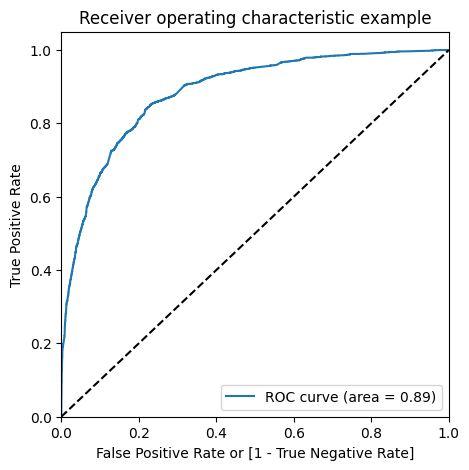

In [161]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We have higher (0.89) area under the ROC curve, therefore our model is a good value.

In [162]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.662025,1,1,1,1,1,1,1,1,0,0,0
1,0,0.081368,0,1,0,0,0,0,0,0,0,0,0
2,0,0.182857,0,1,1,0,0,0,0,0,0,0,0
3,0,0.079650,0,1,0,0,0,0,0,0,0,0,0
4,0,0.178387,0,1,1,0,0,0,0,0,0,0,0


In [164]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.611557,0.973941,0.383055
0.2,0.2,0.742560,0.921010,0.630039
0.3,0.3,0.799559,0.853013,0.765854
0.4,0.4,0.805542,0.780537,0.821309
0.5,0.5,0.807274,0.685668,0.883954
0.6,0.6,0.800189,0.604642,0.923492
0.7,0.7,0.780979,0.518730,0.946341
0.8,0.8,0.754212,0.413274,0.969191
0.9,0.9,0.709652,0.265879,0.989474


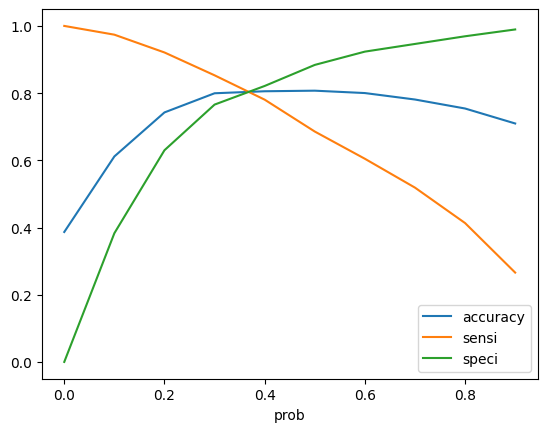

In [165]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.36 is the optimize point to take it as a cutoff probability

In [166]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.662025,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.081368,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.182857,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.079650,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.178387,0,1,1,0,0,0,0,0,0,0,0,0


**Model Evaluation**

In [167]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033380569988978

In [168]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3099,  796],
       [ 453, 2003]])

In [169]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1]
# false negatives
FN = confusion2[1,0]

In [170]:
# Calculate Sensitivity
print ("Sensitivity: ", TP/float(TP+FN))

Sensitivity:  0.8155537459283387


In [171]:
# Calculate Specificity
print ("Specificity: ", TN/float(TN+FP))

Specificity:  0.7956354300385109


In [172]:
# Calculate False Positive rate
print ("False Positive rate: ", FP/float(TN+FP))

False Positive rate:  0.20436456996148908


In [173]:
# Calculate Positive predictive value
print ("Positive predictive value: ", TP/float(TP+FP))

Positive predictive value:  0.7156127188281529


In [174]:
# Calculate Negative predictive value
print ("Negative predictive value: ", TN/float(TN+FN))

Negative predictive value:  0.8724662162162162


With current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80%

# **STEP 9: PREDICTION ON THE TEST SET**

In [175]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [176]:
X_train_rfe24 = X_train_rfe24.drop(["const"],axis=1)

In [177]:
col = X_train_rfe24.columns

In [178]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Specialization_Hospitality Management,Specialization_Select,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Not provided,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7212,1.0,0.028369,0.001320,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2085,1.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8179,1.0,0.170213,0.148768,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
6236,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5240,1.0,0.078014,0.458627,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [179]:

y_test_pred = res.predict(X_test_sm)
# Coverting y_test_pred to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
#
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.340106
1,1,0.839319
2,1,0.985217
3,1,0.889555
4,0,0.168693


In [180]:
# Predict using cut off 0.36
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.340106,0
1,1,0.839319,1
2,1,0.985217,1
3,1,0.889555,1
4,0,0.168693,0
...,...,...,...
2718,1,0.093077,0
2719,0,0.154097,0
2720,0,0.132820,0
2721,1,0.801744,1


In [181]:
# Let's check Accuracy

print ("Accuracy: ", metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted))

Accuracy:  0.808666911494675


In [182]:
# Making confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1396,  348],
       [ 173,  806]])

In [183]:
# true positive
TP = confusion2[1,1]
# true negatives
TN = confusion2[0,0]
# false positives
FP = confusion2[0,1]
# false negatives
FN = confusion2[1,0]

In [184]:
# Calculate Sensitivity
print ("Sensitivity: ", TP/float(TP+FN))

Sensitivity:  0.8232890704800817


In [185]:
# Calculate Specificity
print ("Specificity: ", TN/float(TN+FP))

Specificity:  0.8004587155963303


With the cutoff as 0.36, we have Accuracy, Sensitivity and Specificity around 80%-82%

**Result:**
**Comparing the values Train and Test:**



> Train Data
*  Accuracy: 80.3%
*  Sensitivity: 81.5%
*  Specificity: 79.5%

> Test Data
*  Accuracy: 80.8%
*  Sensitivity: 82.3%
*  Specificity: 80.0%


**CONCLUSION**

First of all, in the process of searching for the best model, we found that there are too many variables affecting the selection process, leading to too many models to run. In general, running many test models in this case we find is not optimal.
However, within the requirements we also found variables that influence potential buyers:
* The total time spend on the Website.
* Total number of visits.
> Lead source (In descending order):
* Google
* Direct traffic
* Organic search
* Welingak website
> Priority Active:
* SMS
* Chat conversation
> Priority should be given to the following industries to have a high chance of achieving leads:
* Working professional


